In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #그래프 출력시
import matplotlib as mpl    #그래프 옵션
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

#그래프 시각화 옵션 설정함수
%matplotlib inline

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

# Data

+ https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

< Columns Info >
+ Gender: Gender of the passengers (Female, Male)
+ Customer Type: The customer type (Loyal customer, disloyal customer)
+ Age: The actual age of the passengers
+ Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
+ Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
+ Flight distance: The flight distance of this journey
+ Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
+ Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
+ Ease of Online booking: Satisfaction level of online booking
+ Gate location: Satisfaction level of Gate location
+ Food and drink: Satisfaction level of Food and drink
+ Online boarding: Satisfaction level of online boarding
+ Seat comfort: Satisfaction level of Seat comfort
+ Inflight entertainment: Satisfaction level of inflight entertainment
+ On-board service: Satisfaction level of On-board service
+ Leg room service: Satisfaction level of Leg room service
+ Baggage handling: Satisfaction level of baggage handling
+ Check-in service: Satisfaction level of Check-in service
+ Inflight service: Satisfaction level of inflight service
+ Cleanliness: Satisfaction level of Cleanliness
+ Departure Delay in Minutes: Minutes delayed when departure
+ Arrival Delay in Minutes: Minutes delayed when Arrival
+ Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [13]:
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

In [14]:
train=pd.read_csv('/root/MLAI-Project-Team3/AirplaneDataset/train.csv')
test=pd.read_csv('/root/MLAI-Project-Team3/AirplaneDataset/test.csv')

train=train.drop(['Unnamed: 0', 'id'],axis=1).reset_index(drop=True)
test=test.drop(['Unnamed: 0', 'id'],axis=1).reset_index(drop=True)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
def preprocess(data, mode='train'):
    label_list=['Gender','Customer Type','Type of Travel','Class','satisfaction']
    
    for i in label_list:
        y1=data[[i]].values.tolist()
        encoder=LabelEncoder()
        encoder.fit(y1)
        label1=encoder.transform(y1)
        data[i]=label1
        
    return data

In [6]:
train_clean=preprocess(train)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# EDA

(0.0, 100.0)

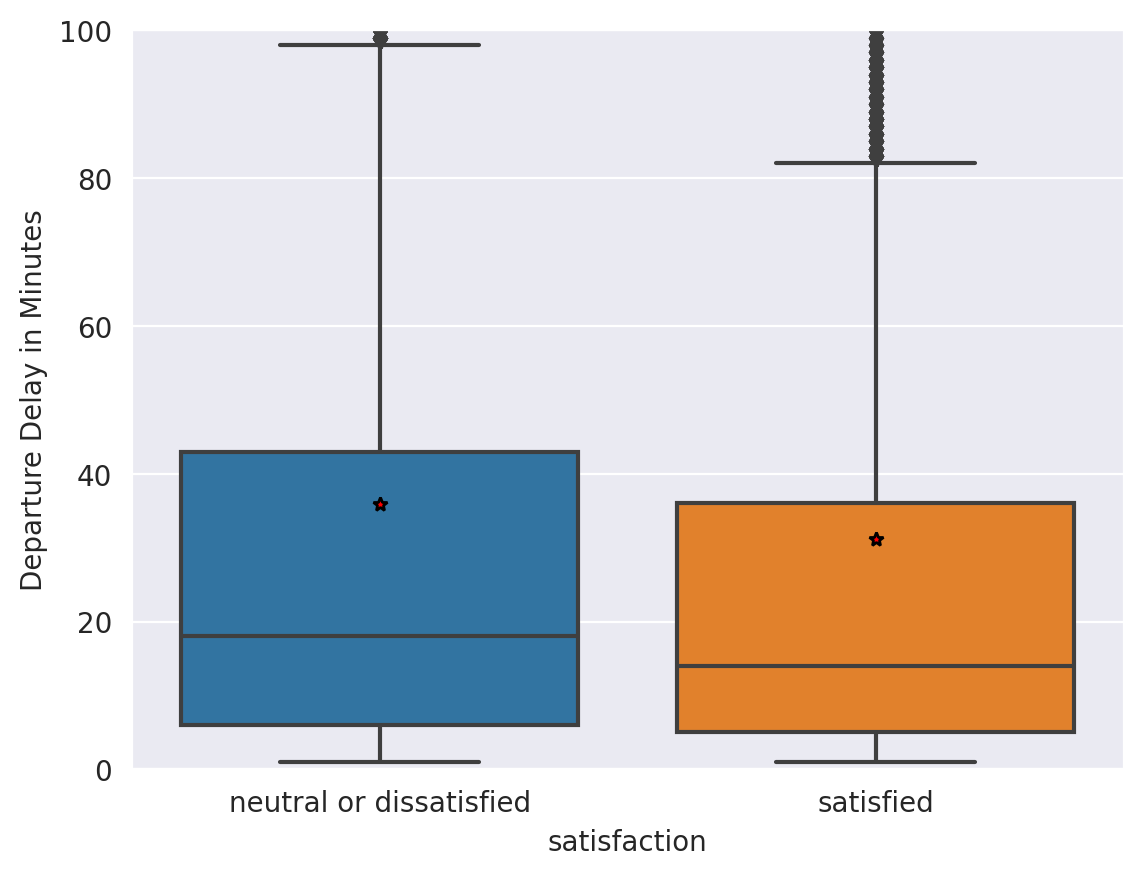

In [32]:
sns.boxplot(x=train[train['Departure Delay in Minutes']!=0]['satisfaction'],
            y=train['Departure Delay in Minutes'],
            showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.ylim(0,100)

(0.0, 100.0)

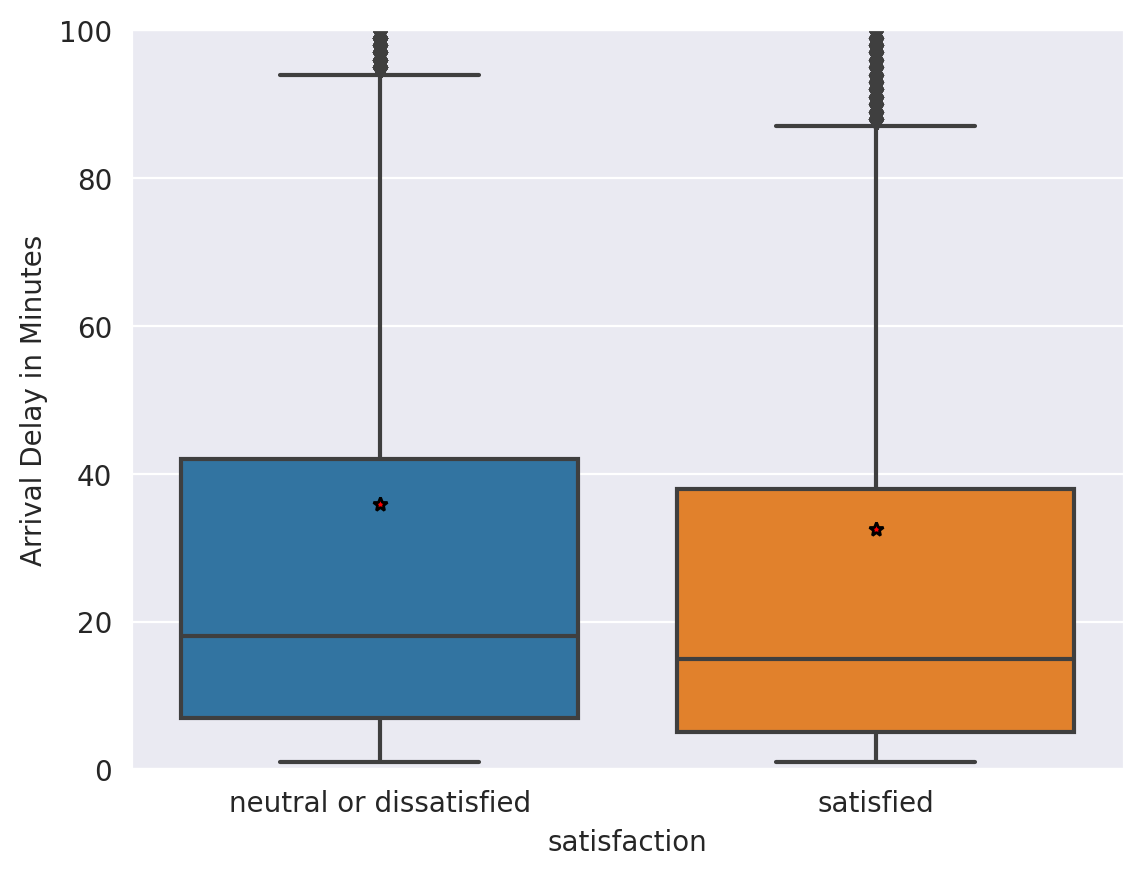

In [30]:
sns.boxplot(x=train[train['Arrival Delay in Minutes']!=0]['satisfaction'],
            y=train['Arrival Delay in Minutes'],
            showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
plt.ylim(0,100)

<AxesSubplot: xlabel='satisfaction', ylabel='Flight Distance'>

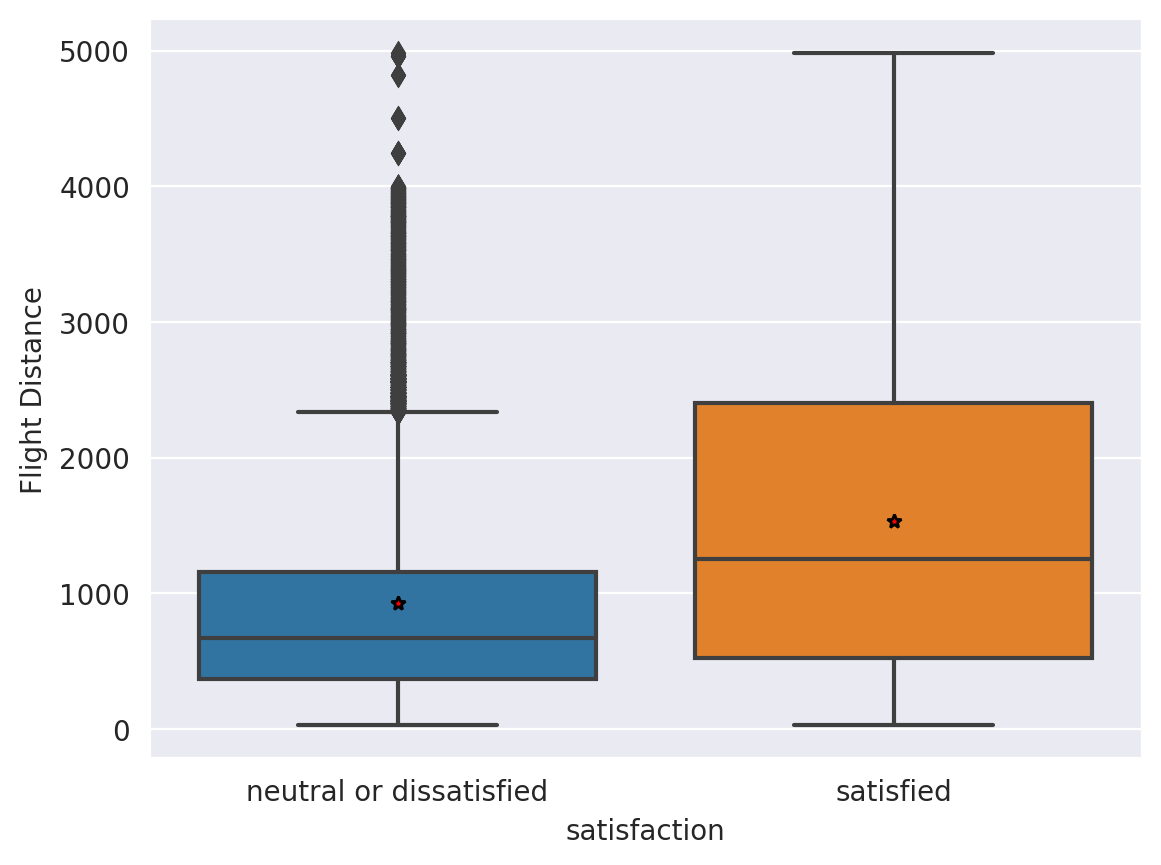

In [26]:
sns.boxplot(x=train['satisfaction'],y=train['Flight Distance'],
            showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})

<AxesSubplot: xlabel='satisfaction', ylabel='Age'>

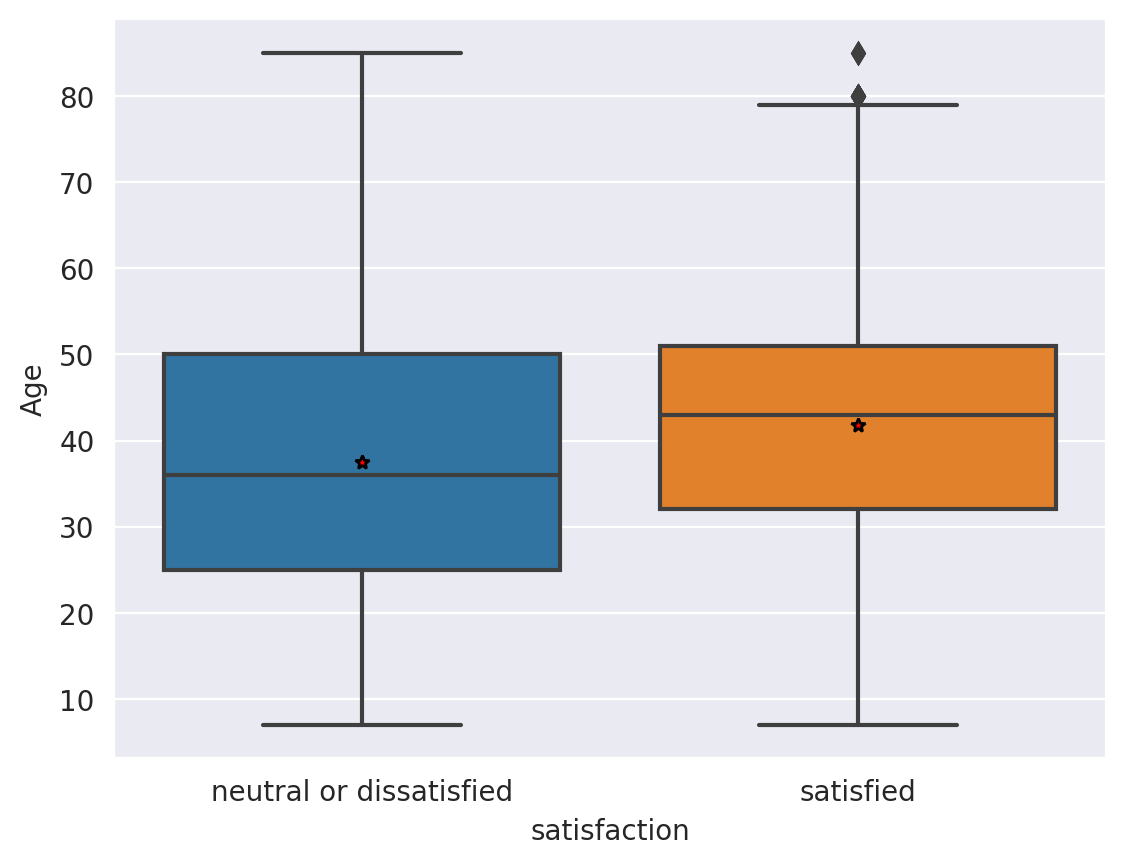

In [31]:
sns.boxplot(x=train['satisfaction'],y=train['Age'],
            showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"5"})